In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path
import re

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [10]:
# cores padrão para as legendas
colorMAP = {
    'PA' : '#FF7F0E',
    'PB' : '#2CA02C',
    'p=0.1' : '#1F77B4',
    'p=0.2' : '#1F77B4',
    'p=0.3' : '#1F77B4',
    'p=0.4' : '#1F77B4',
    'p=0.5' : '#1F77B4',
    'p=0.6' : '#1F77B4',
    'p=0.7' : '#1F77B4',
    'p=0.8' : '#1F77B4',
    'p=0.9' : '#1F77B4'
}

In [11]:
def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

# InterfModel=0,node=1 0
def obter_interfmodel(item):
    interfModel = item[12]
    return interfModel

def obter_node(item):
    node = item[19]
    return node

def obter_repeticao(texto):
    match = re.findall('\d+', texto)
    if match and len(match) == 3:
        nro = match[1]
        return int(nro)
    else:
        raise Exception('Erro ao Identificar a repeticao do registro')

In [12]:
# arquivo de interesse
FILE = 'packet_breakdown_all.txt' 

colunas = ['Informacoes',
           'Failed, buffer overflow',
           'Failed, busy channel',
           'Failed, no ack',
           'Success, first try',
           'Success, not first try']

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

# Data Frame com todos os dados.
DATA = pd.DataFrame()

# captura dos dados 
for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['Modelo de colisao'] = dfPRR['Informacoes'].apply(obter_interfmodel)
        dfPRR['node'] = dfPRR['Informacoes'].apply(obter_node)
        dfPRR['repeticao'] = dfPRR['Informacoes'].apply(obter_repeticao)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')

# Pré-processamento dos dados
DATA = DATA.drop('Informacoes', axis=1)
DATA = DATA[DATA['Modelo de colisao'] != 2]


coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


In [13]:
col = ['Failed, buffer overflow',
       'Failed, busy channel',
       'Failed, no ack',
       'Success, first try',
       'Success, not first try']

DATA['total packets'] = DATA[col].sum(axis=1)
DATA['buffer overflow rate'] = DATA['Failed, buffer overflow'] / DATA['total packets']
DATA['busy channel rate'] = DATA['Failed, busy channel'] / DATA['total packets']
DATA['no ack rate'] = DATA['Failed, no ack'] / DATA['total packets']

DATA['sucess rate, first try'] = DATA['Success, first try'] / DATA['total packets']
DATA['sucess rate, not first try'] = DATA['Success, not first try'] / DATA['total packets']

In [14]:
DATA.head()

,"Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",Modelo de colisao,node,repeticao,simulacao,total packets,buffer overflow rate,busy channel rate,no ack rate,"sucess rate, first try","sucess rate, not first try"
0,0,106,107,2223,562,0,1,1,PA,2998,0.0,0.035357,0.035690,0.741494,0.187458
1,0,123,78,2211,586,0,1,1,PA,2998,0.0,0.041027,0.026017,0.737492,0.195464
2,0,98,78,2220,601,0,1,1,PA,2997,0.0,0.032699,0.026026,0.740741,0.200534
3,0,100,68,2301,529,0,1,1,PA,2998,0.0,0.033356,0.022682,0.767512,0.176451
4,0,109,96,2157,637,0,1,1,PA,2999,0.0,0.036345,0.032011,0.719240,0.212404


In [35]:
DATA.describe()

,"Failed, buffer overflow","Failed, busy channel","Failed, no ack","Success, first try","Success, not first try",repeticao,total packets,buffer overflow rate,busy channel rate,no ack rate,"sucess rate, first try","sucess rate, not first try"
count,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000
mean,887.460788,28.174788,315.502970,2935.995091,915.895273,3.000000,5083.028909,0.121289,0.006823,0.063241,0.610210,0.198437
std,1118.717557,26.573644,381.987837,1007.727958,221.154451,1.414256,2021.231729,0.149517,0.007530,0.072387,0.133616,0.058950
min,0.000000,1.000000,1.000000,1244.000000,353.000000,1.000000,2955.000000,0.000000,0.000134,0.000334,0.174635,0.060456
25%,0.000000,15.000000,90.000000,2107.000000,765.000000,2.000000,2998.000000,0.000000,0.002411,0.018754,0.529252,0.151597
50%,3.000000,19.000000,185.000000,2693.000000,935.000000,3.000000,4491.000000,0.000668,0.004670,0.037632,0.639067,0.196172
75%,1846.000000,24.000000,374.000000,3649.000000,1103.000000,4.000000,7466.000000,0.247164,0.007336,0.074741,0.715776,0.247109
max,3938.000000,133.000000,2565.000000,5668.000000,1453.000000,5.000000,7497.000000,0.527458,0.043696,0.417502,0.818819,0.344782


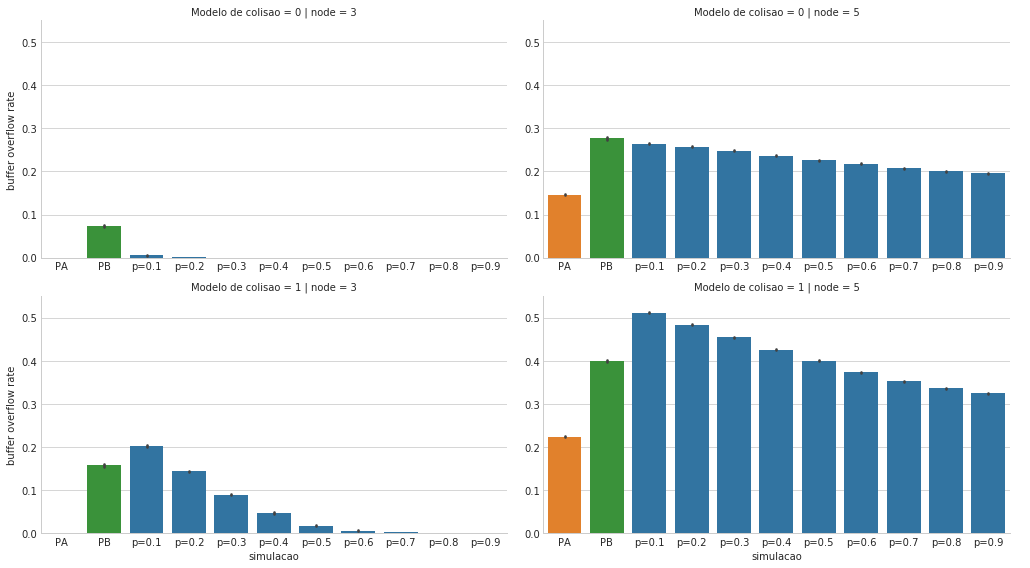

In [28]:
select = (DATA['Modelo de colisao'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['node'] != '4' )
# select = (DATA['InterfModel'] != '2')
# select = (DATA['InterfModel'] != '2') & (DATA['node'] != '1' ) & (DATA['node'] != '2' ) & (DATA['simulacao'] != 'PA') & (DATA['simulacao'] != 'PB')
df = DATA[select]

grid = sns.factorplot(x='simulacao', y='buffer overflow rate', 
                      row='Modelo de colisao',
                      col="node",
                      kind='bar',
                      data = df,
                      ci=80.0,
                      palette=colorMAP,
                      legend_out=True,
                      sharex=False,
                      sharey=False,
                      aspect=1.8
                     )

grid.add_legend()
grid.set(ylim=(0,0.55))

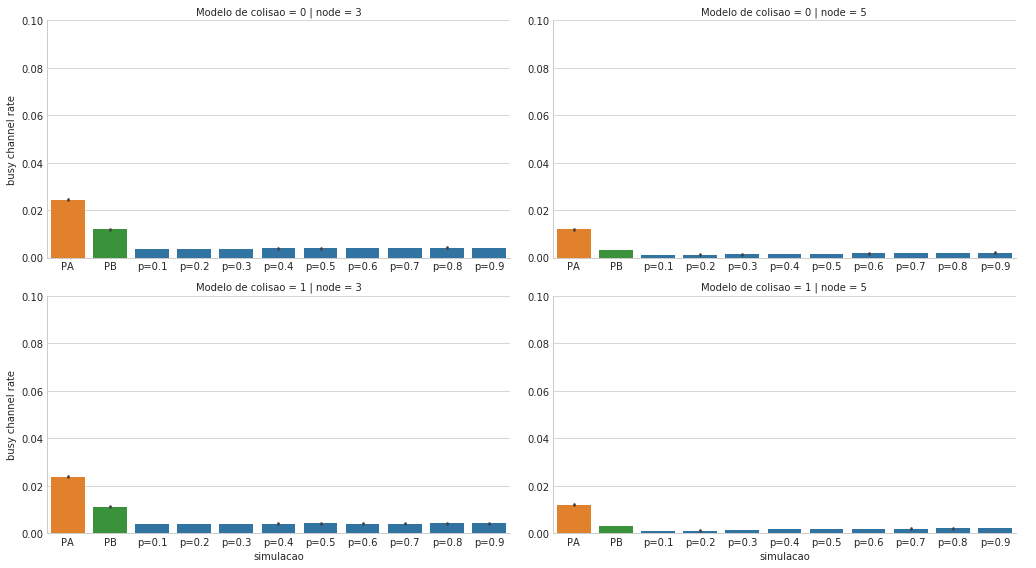

In [30]:
grid = sns.factorplot(x='simulacao', y='busy channel rate', 
                      row='Modelo de colisao',
                      col="node",
                      kind='bar',
                      data = df,
                      ci=80.0,
                      palette=colorMAP,
                      legend_out=True,
                      sharex=False,
                      sharey=False,
                      aspect=1.8
                     )

grid.add_legend()
grid.set(ylim=(0,0.1))

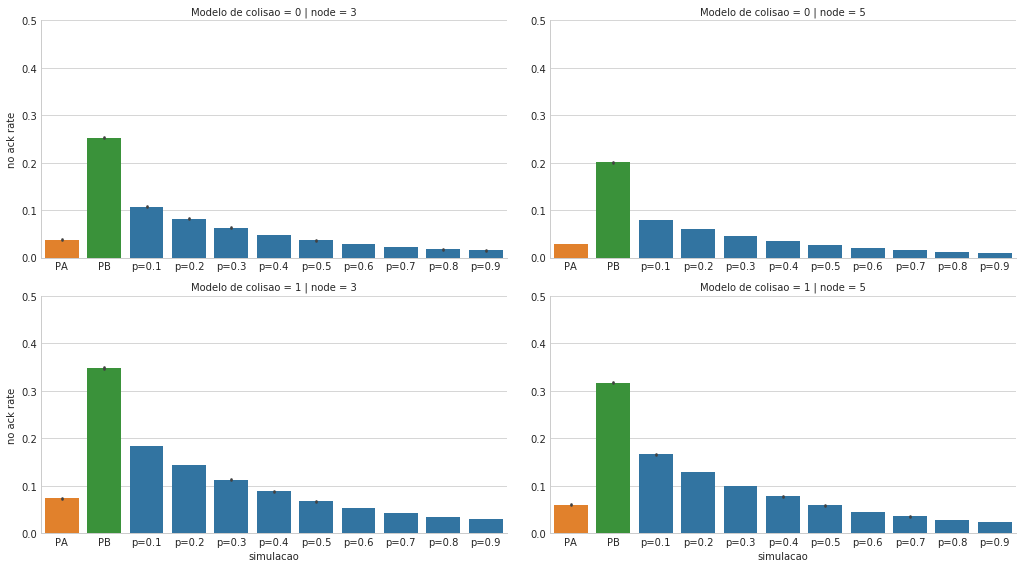

In [32]:
grid = sns.factorplot(x='simulacao', y='no ack rate', 
                      row='Modelo de colisao',
                      col="node",
                      kind='bar',
                      data = df,
                      ci=80.0,
                      palette=colorMAP,
                      legend_out=True,
                      sharex=False,
                      sharey=False,
                      aspect=1.8
                     )
grid.add_legend()
grid.set(ylim=(0,0.5))

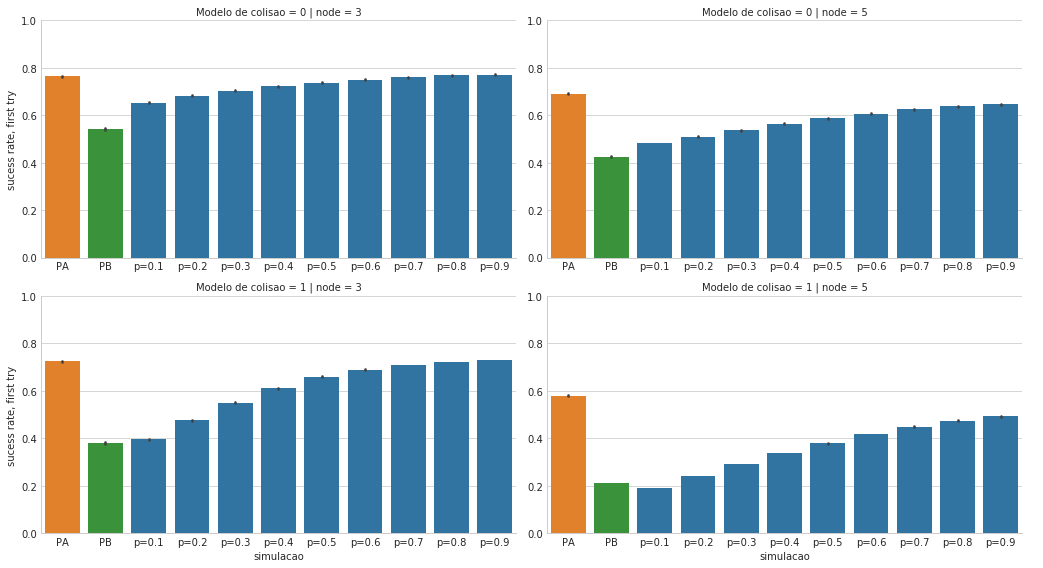

In [33]:
grid = sns.factorplot(x='simulacao', y='sucess rate, first try', 
                      row='Modelo de colisao',
                      col="node",
                      kind='bar',
                      data = df,
                      ci=80.0,
                      palette=colorMAP,
                      legend_out=True,
                      sharex=False,
                      sharey=False,
                      aspect=1.8
                     )
grid.add_legend()
grid.set(ylim=(0,1))

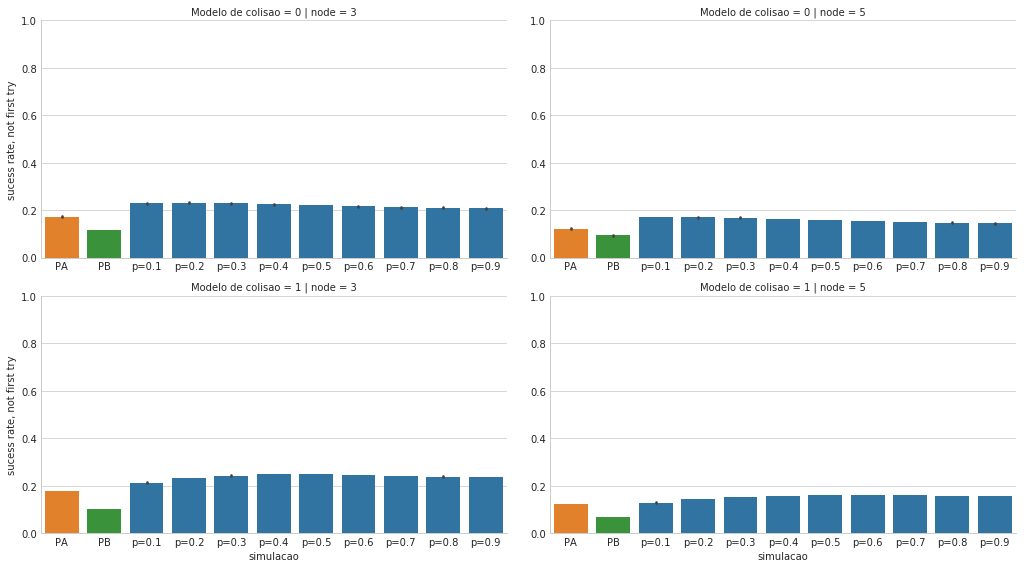

In [34]:
grid = sns.factorplot(x='simulacao', y='sucess rate, not first try', 
                      row='Modelo de colisao',
                      col="node",
                      kind='bar',
                      data = df,
                      ci=80.0,
                      palette=colorMAP,
                      legend_out=True,
                      sharex=False,
                      sharey=False,
                      aspect=1.8
                     )
grid.add_legend()
grid.set(ylim=(0,1))